In [1]:
%matplotlib inline
%cd ..
from src.LRGSG_package.LRGSG import *

/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
ssize_list = [2**k for k in range(4, 8)]
nrep = [range(2**(16-2*k)) for k in range(4, 8)]
pval_list = [0.01, 0.09, 0.098, 0.099, 0.100, 0.102, 0.104, 0.2]
print('list of sizes', ssize_list, '\nlist of flip probs', pval_list, '\nlist of replicas', nrep)

list of sizes [16, 32, 64, 128] 
list of flip probs [0.01, 0.09, 0.098, 0.1, 0.102, 0.104, 0.24] 
list of replicas [range(0, 256), range(0, 64), range(0, 16), range(0, 4)]


In [3]:
d_lmin = []

for i,L in enumerate(ssize_list):
    nedges = 2*L**2
    for p in pval_list:
        path = f"{datPath_lminl2d}N={L*L}/"
        savename = f"{path}p={p:.3g}.txt"
        lmin = []
        for nr in tqdm(nrep[i], desc=f"replicas for L={L}, p={p}"):
            G = nx.grid_2d_graph(L, L, periodic=True)
            ransample = random.sample(range(nedges), int(p*nedges))
            #
            all_weights = {e: 1 for e in G.edges()}
            neg_weights = {e: -1 for i,e in enumerate(G.edges()) if i in ransample}
            #
            nx.set_edge_attributes(G, values=all_weights, name='weight')
            nx.set_edge_attributes(G, values=neg_weights, name='weight')
            slapl = get_graph_lapl(G)
            try:
                lmin_tmp, _ = eigsh(slapl, k=1, which='SM', tol=1e-10)
            except ArpackNoConvergence:
                pass
            lmin.append(lmin_tmp)
        lminarr = np.array(lmin).flatten()
        d_lmin.append({'L': L, 'p':p, 'lmin': lminarr})
        if not os.path.isdir(path):
            os.makedirs(path)
        np.savetxt(savename, lminarr)

replicas for L=16, p=0.24: 100%|██████████| 256/256 [00:17<00:00, 14.25it/s]


Text(0.5, 0, '$\\langle\\lambda_\\min\\rangle$')

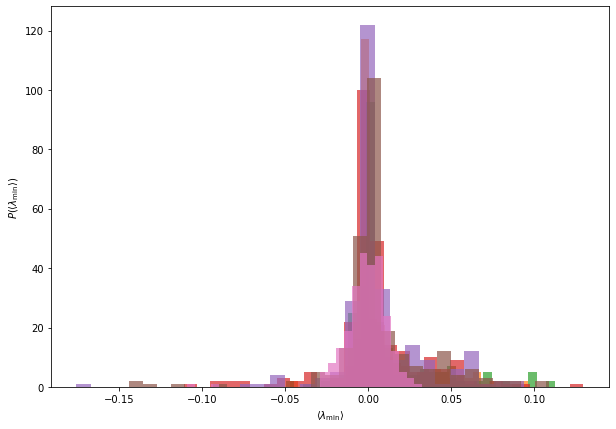

In [11]:
plt.figure(figsize=(10, 7))
L = 16
for p in pval_list:
    path = f"{datPath_lminl2d}N={L*L}/"
    lminarr = np.loadtxt(f"{path}p={p:.3g}.txt")
    plt.hist(lminarr, alpha=0.7, bins=30)
plt.ylabel(r'$P(\langle\lambda_\min\rangle$)')
plt.xlabel(r'$\langle\lambda_\min\rangle$')

Text(0, 0.5, '$\\langle\\lambda_\\min\\rangle$')

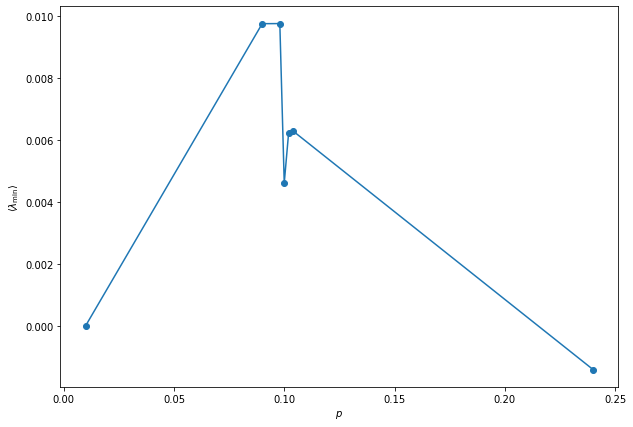

In [14]:
plt.figure(figsize=(10, 7))
L = 16
lmin_avg = []
for p in pval_list:
    path = f"{datPath_lminl2d}N={L*L}/"
    lminarr = np.loadtxt(f"{path}p={p:.3g}.txt")
    lmin_avg.append([p, np.mean(lminarr)])
lmin_avg = np.array(lmin_avg)
plt.plot(lmin_avg[:,0],lmin_avg[:, 1], 'o-')
plt.xlabel(r'$p$')
plt.ylabel(r'$\langle\lambda_\min\rangle$')

In [ ]:
L = 16
nrep = [range(2**(17-2*k)) for k in range(4, 8)]
p = 0.1
nedges = 2*L**2
lmin = []
for nr in tqdm(nrep[0]):
    G = nx.grid_2d_graph(L, L, periodic=True)
    ransample = random.sample(range(nedges), int(p*nedges))
    #
    all_weights = {e: 1 for e in G.edges()}
    neg_weights = {e: -1 for i,e in enumerate(G.edges()) if i in ransample}
    #
    nx.set_edge_attributes(G, values=all_weights, name='weight')
    nx.set_edge_attributes(G, values=neg_weights, name='weight')
    slapl = slaplacian_matrix(G).asfptype()
    try:
        lmin_tmp, _ = eigsh(slapl, k=1, which='SM', tol=1e-10)
    except ArpackNoConvergence:
        pass
    lmin.append(lmin_tmp)

In [ ]:
plt.hist(np.array(lmin).flatten(), bins=20)
plt.yscale('log')

In [ ]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(10, 10))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, edge_color=colors, pos=pos, node_size=10, width=5)

# JUNK

In [ ]:
L = 4
G = nx.grid_2d_graph(L, L, periodic=True)
L1 = slaplacian_matrix(G)
L2 = nx.laplacian_matrix(G)
L1.asfptype() - L2.asfptype()

In [ ]:
ransample = random.sample(range(2*L*L), 2*L*L)
neg_weights = {e: -1 for i,e in enumerate(G.edges()) if i in ransample}
nx.set_edge_attributes(G, values=neg_weights, name='weight')
L1 = slaplacian_matrix(G)
L2 = nx.laplacian_matrix(G)
L1.asfptype() - L2.asfptype()